In [1]:
#import necessary libraries to begin
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#load the dataset
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check if there are any missing values

df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Check how many unique values there are

df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [6]:
# Check the range of each feature

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# replace zeros with nan for features that should not have zero as a natural value so counting them would be easier

df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

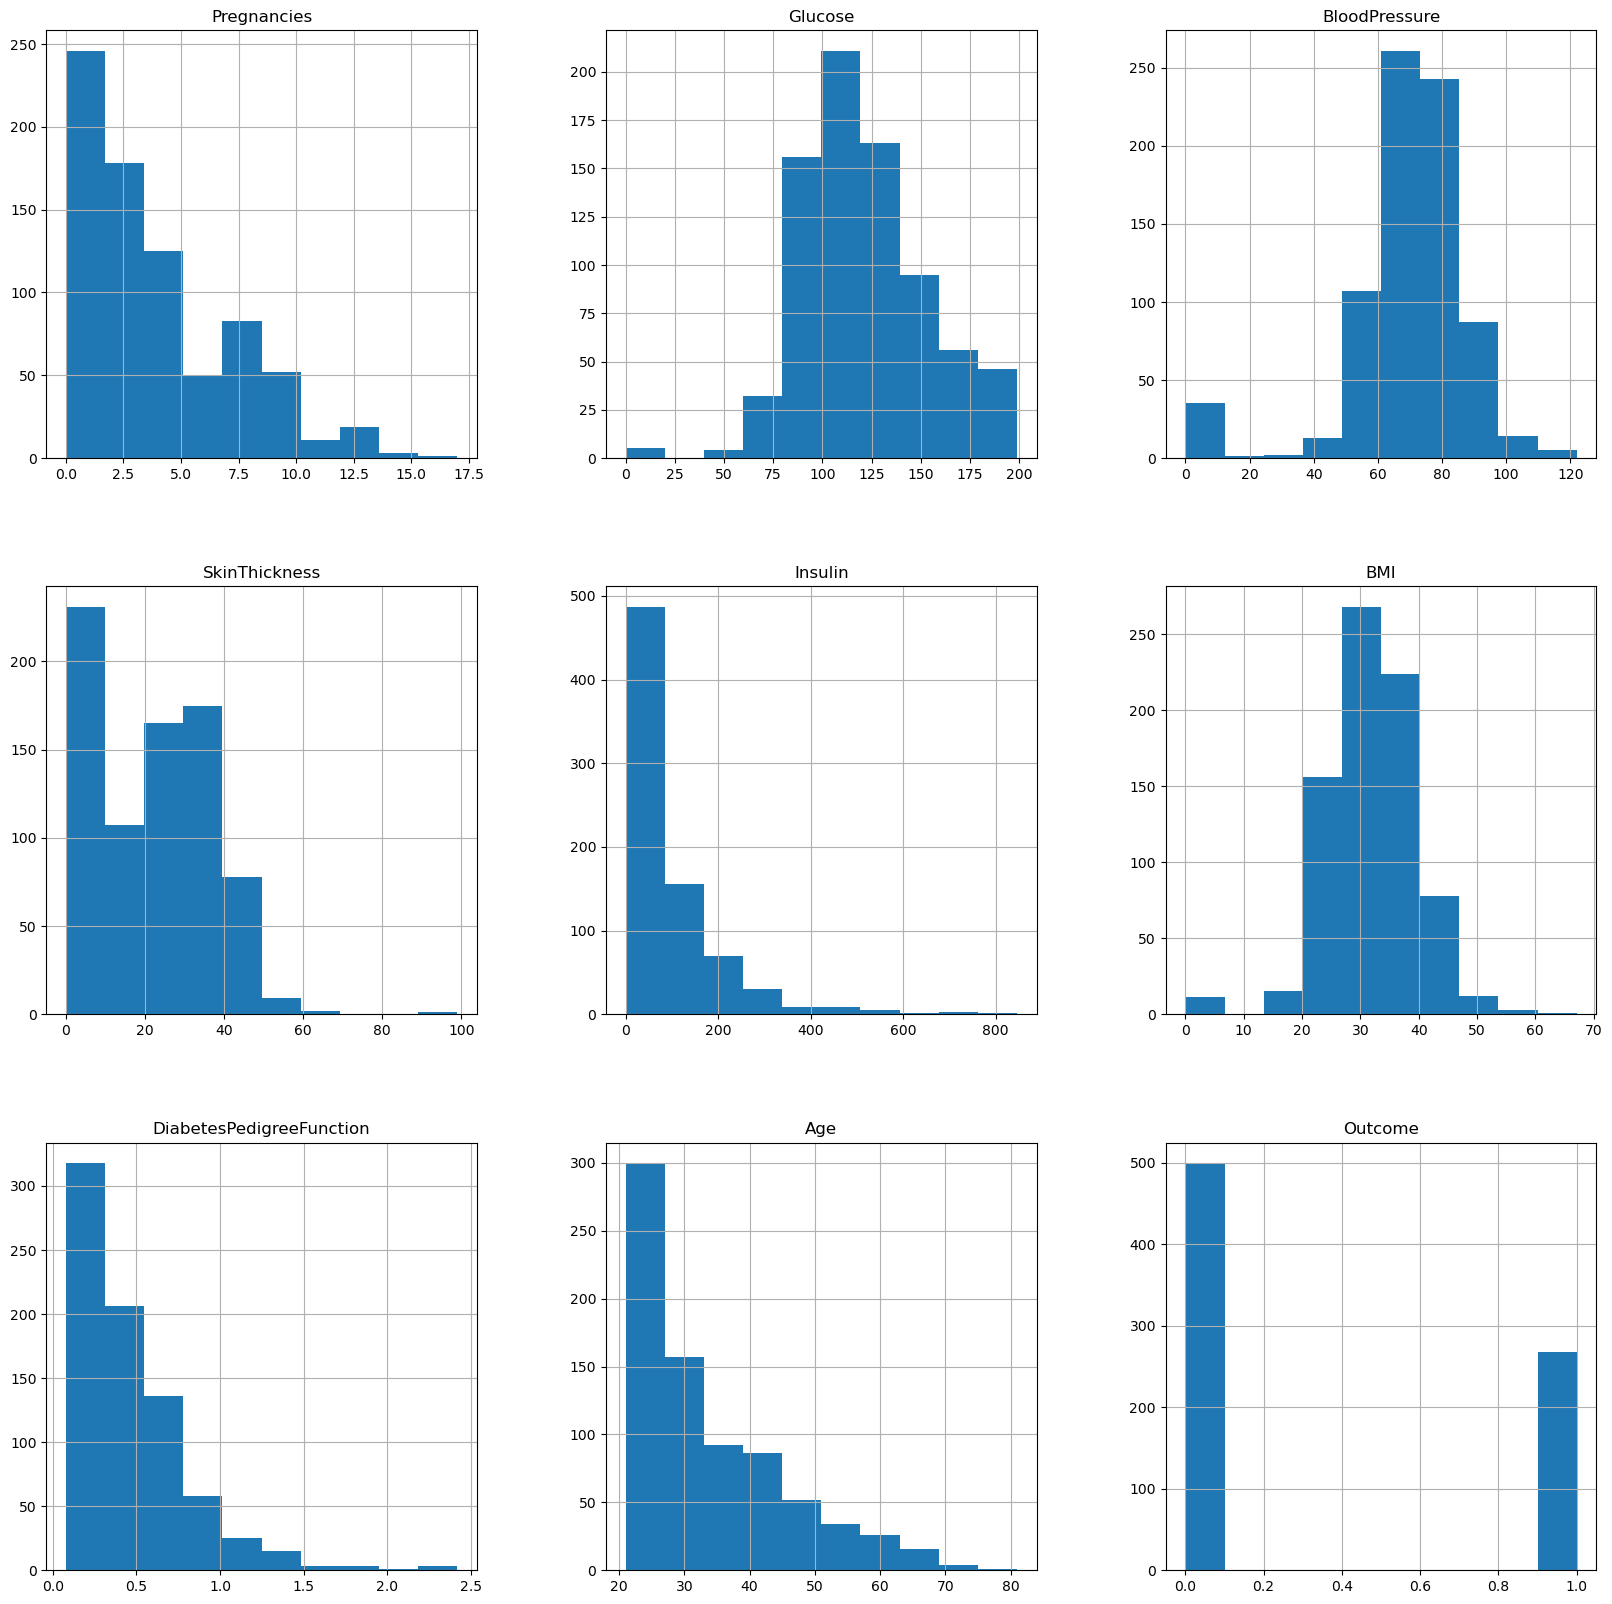

In [8]:
# plot the features in histograms to understand the data distribution

p = df.hist(figsize = (20,20))

In [9]:
#impute nan values for the columns in accordance with their distribution

df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

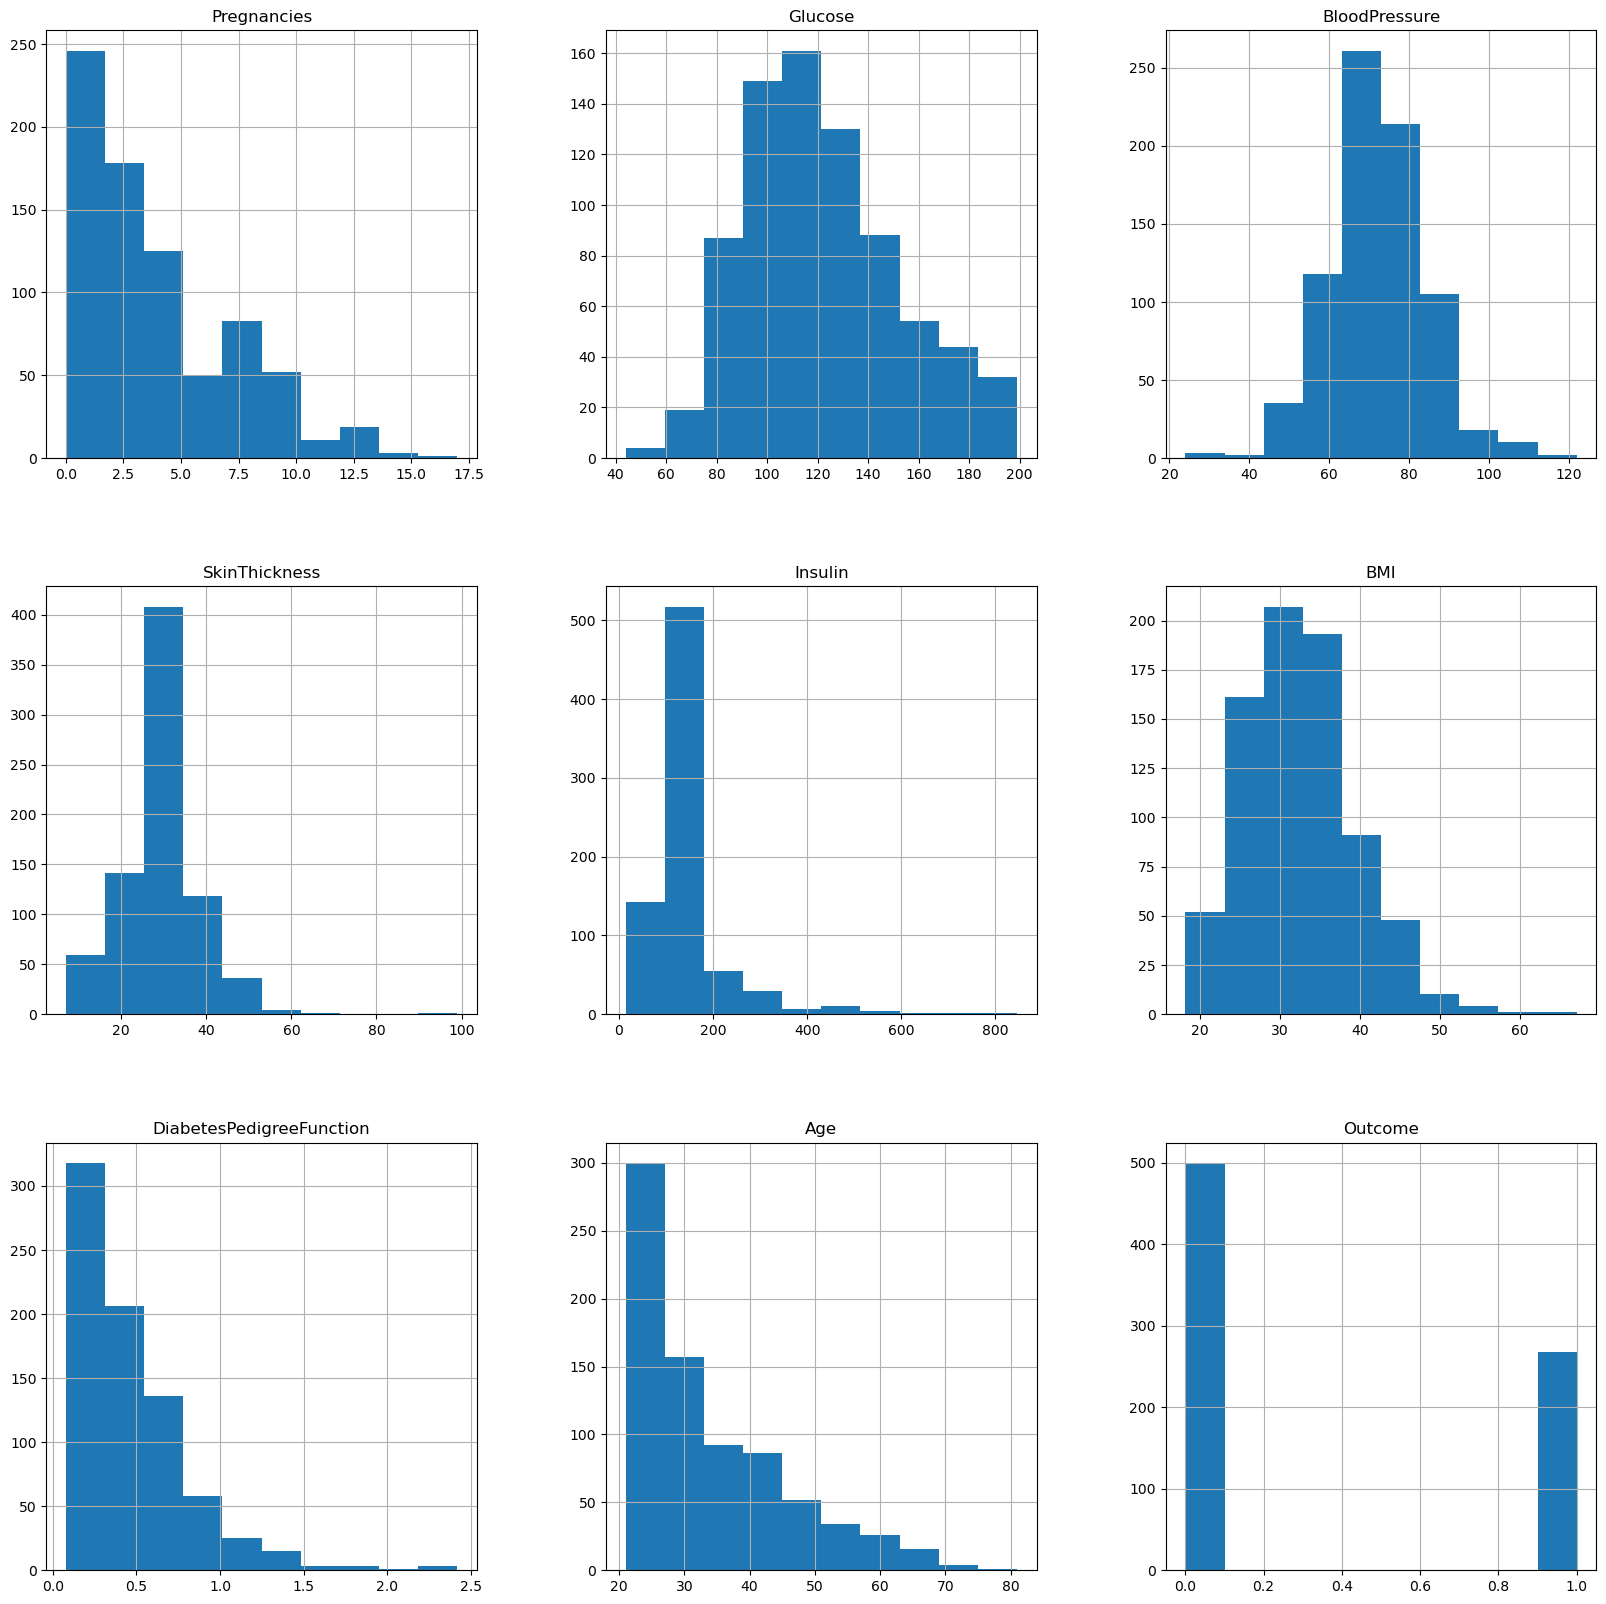

In [10]:
#Plot histogram again after Nan removal

p = df_copy.hist(figsize = (20,20))

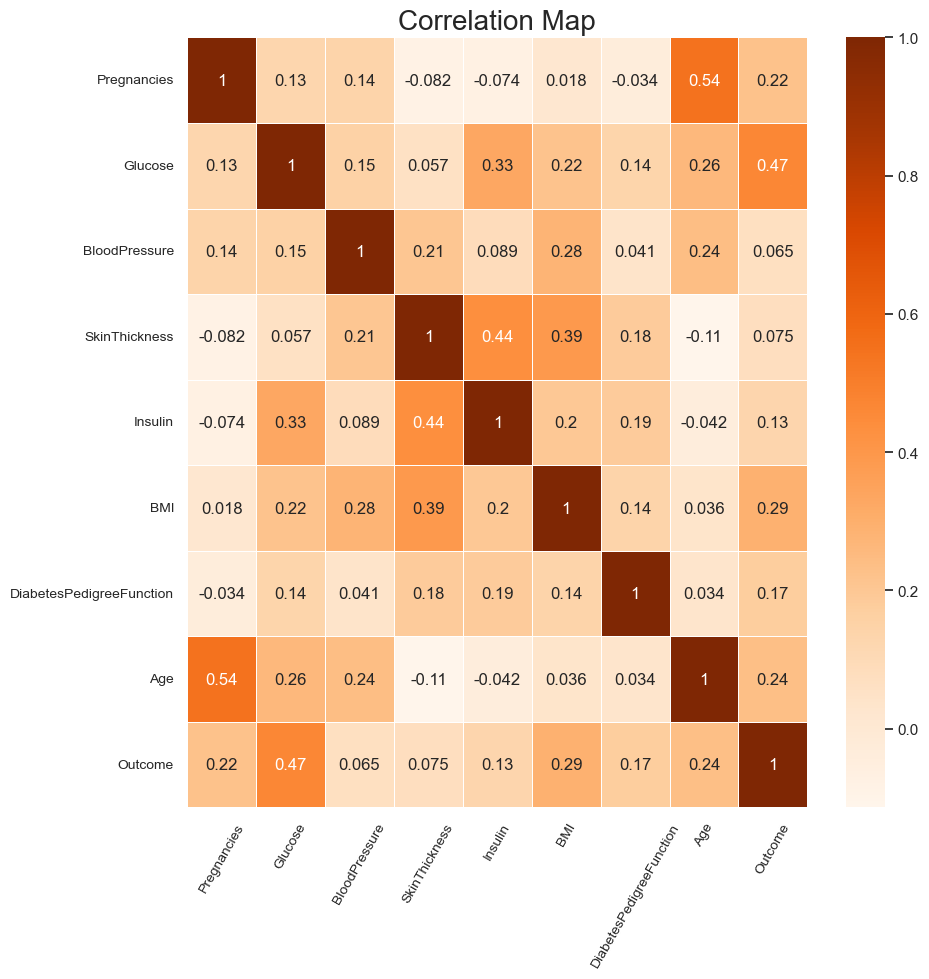

In [11]:
# draw a correlation map to show relationship between features before cleaning data

def correlation_map(dataframe, plot=False):
    corr = dataframe.corr()
    if plot:
        sns.set(rc={'figure.figsize': (10, 10)})
        sns.heatmap(corr, cmap="Oranges", annot=True, linewidths=.7)
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Correlation Map', size=20)
        plt.show()

correlation_map(df, plot=True)

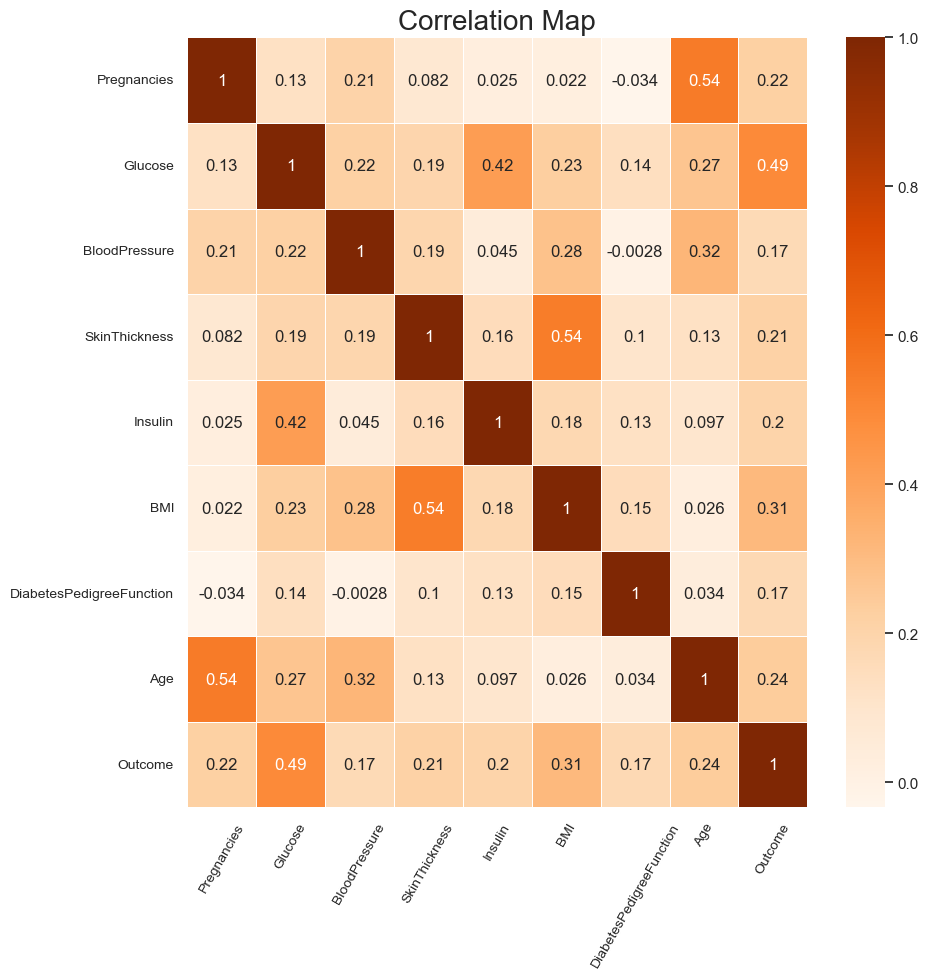

In [12]:
# draw a correlation map to show relationship between features after cleaning data

correlation_map(df_copy, plot=True)

In [13]:
# Split the dataset into features and labels

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X =  pd.DataFrame(sc.fit_transform(df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [14]:
y = df_copy.Outcome

In [15]:
#Label encode target vector to use for labelling confusion matrix

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Class Names :", label_encoder.classes_)

Class Names : [0 1]


In [17]:
# Split the dataset into training and testing sets. Since majority of the samples are from one class so we use stratify to ensure proper distribution

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [18]:
# Using KNN classifier
# Define the range of hyperparameters to search over.
# Use GridSearchCV to search over the hyperparameters and select the best model with cross-validation.

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#In case of classifier knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,15)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))
best_model_knn = knn_cv.best_estimator_
best_model_knn

Best Score:0.7669977081741788
Best Parameters: {'n_neighbors': 13}


KNeighborsClassifier(n_neighbors=13)

In [20]:
# make predictions on the testing data using the best KNN classifier and evaluate the performance of the model
from sklearn.metrics import accuracy_score

y_pred_knn = best_model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy: {:.2f}%".format(accuracy_knn*100))

Accuracy: 77.92%


In [21]:
# write a function to create a heatmap plot of the confusion matrix.

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_actual, y_pred, labels, title):

    
    mat = confusion_matrix(y_actual, y_pred)

    sns.heatmap(mat, 
                xticklabels=labels,  
                yticklabels=labels, 
                square=True, annot=True, cbar=False, 
                fmt='d')
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.title(title)

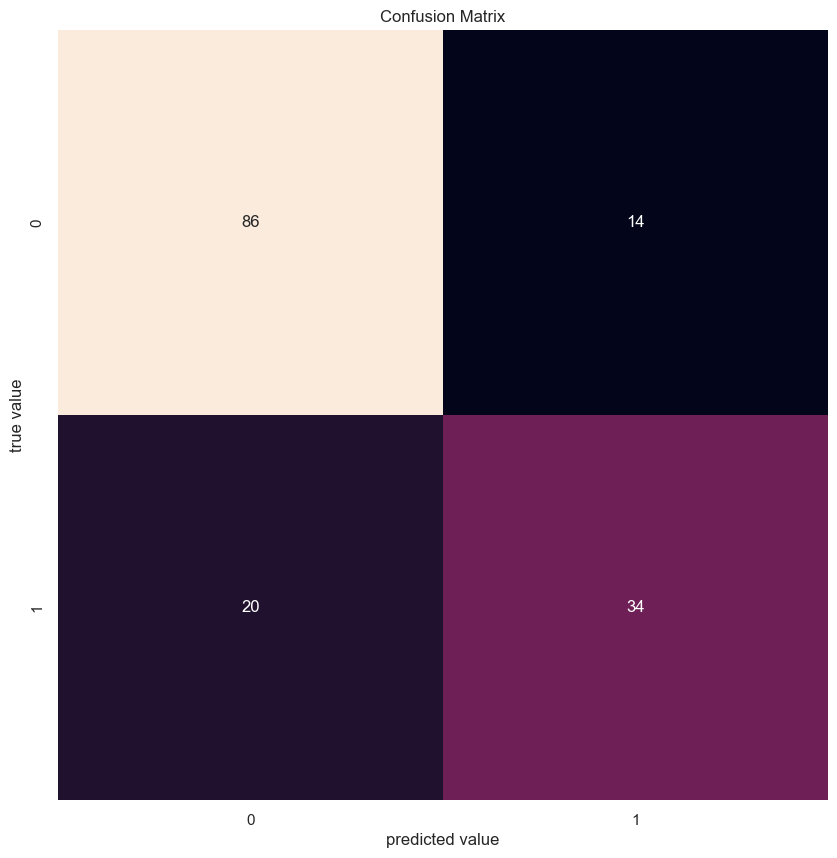

In [22]:
#plot the confusion matrix for best KNN model

plot_confusion_matrix(y_test, y_pred_knn, label_encoder.classes_, "Confusion Matrix")

In [23]:
#print classification report for knn

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       100
           1       0.71      0.63      0.67        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.78       154



In [24]:
# Using neural network classifier

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

# Define the hyperparameter grid to search over
param_grid = {
    'hidden_layer_sizes': [(10,), (10,10), (10,10,10)],
    'activation': ['tanh', 'relu'],
    'max_iter': [100, 200, 500]
}

# Create a GridSearchCV object to search over the hyperparameter grid
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best MLP classifier from the GridSearchCV object
best_model_mlp = grid_search.best_estimator_
best_model_mlp

/Users/mohammadislam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohammadislam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohammadislam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohammadislam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warning

/Users/mohammadislam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohammadislam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohammadislam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohammadislam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

/Users/mohammadislam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohammadislam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohammadislam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohammadislam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warning

MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 10))

In [25]:
# Make predictions on the testing data using the best MLP classifier and evaluate the performance of the model

y_pred_mlp = best_model_mlp.predict(X_test)


accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy: {:.2f}%".format(accuracy_mlp*100))

Accuracy: 74.68%


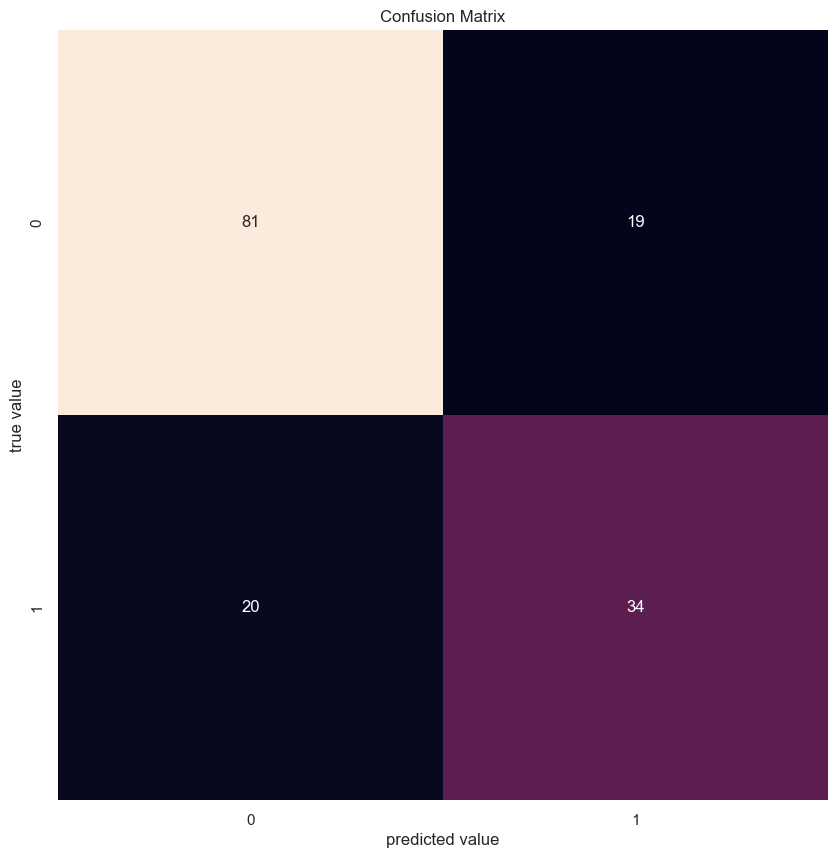

In [26]:
#plot the confusion matrix for best neural network model

plot_confusion_matrix(y_test, y_pred_mlp, label_encoder.classes_, "Confusion Matrix")

In [27]:
#print classification report for neural network

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       100
           1       0.64      0.63      0.64        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [28]:
from sklearn.linear_model import LogisticRegression

lgreg = LogisticRegression()

# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10]
}

# Create a GridSearchCV object to search over the hyperparameter grid
grid_search = GridSearchCV(lgreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best logistic regression model from the GridSearchCV object
best_model_lgreg = grid_search.best_estimator_
best_model_lgreg

LogisticRegression(C=0.5)

In [29]:
# Make predictions on the testing data using the best logistic regression classifier and evaluate the performance of the model

y_pred_lgreg = best_model_lgreg.predict(X_test)

accuracy_lgreg = accuracy_score(y_test, y_pred_lgreg)
print("Accuracy: {:.2f}%".format(accuracy_lgreg*100))

Accuracy: 70.13%


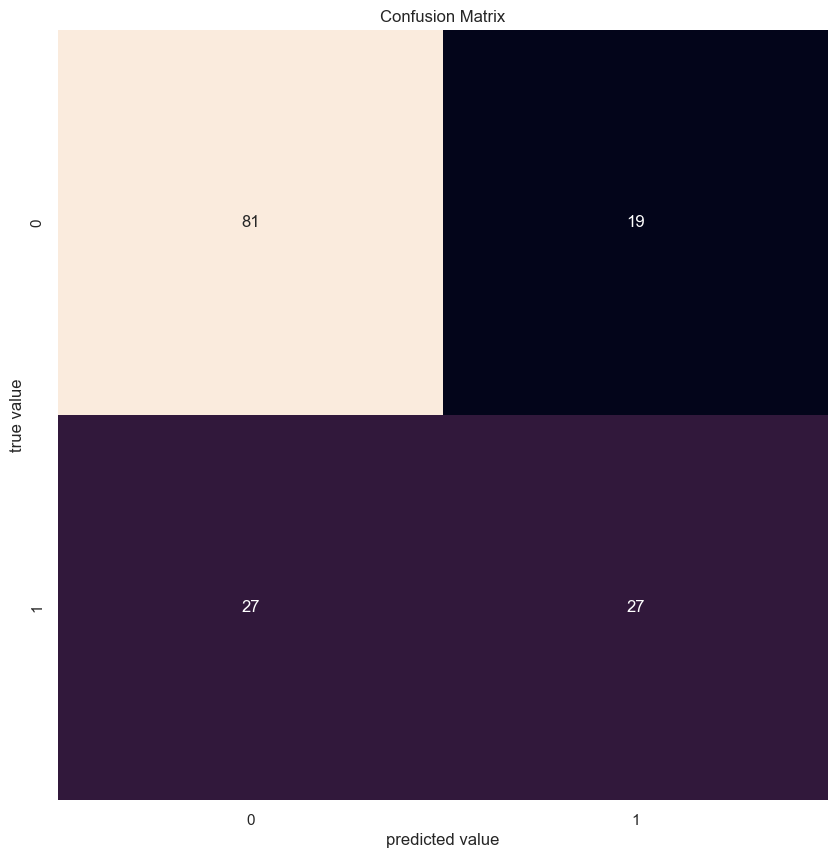

In [30]:
#plot the confusion matrix for best logistic regression model

plot_confusion_matrix(y_test, y_pred_lgreg, label_encoder.classes_, "Confusion Matrix")

In [31]:
#print classification report for logistic regression

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lgreg))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



In [32]:
# Define a dictionary to show the models and their corresponding accuracies in a table

data = {'Model': ['KNN', 'Neural Network', 'Logistic Regression'],
        
        'Accuracy': [accuracy_knn, accuracy_mlp, accuracy_lgreg]}

table = pd.DataFrame(data=data)
table

,Model,Accuracy
0,KNN,0.779221
1,Neural Network,0.746753
2,Logistic Regression,0.701299
